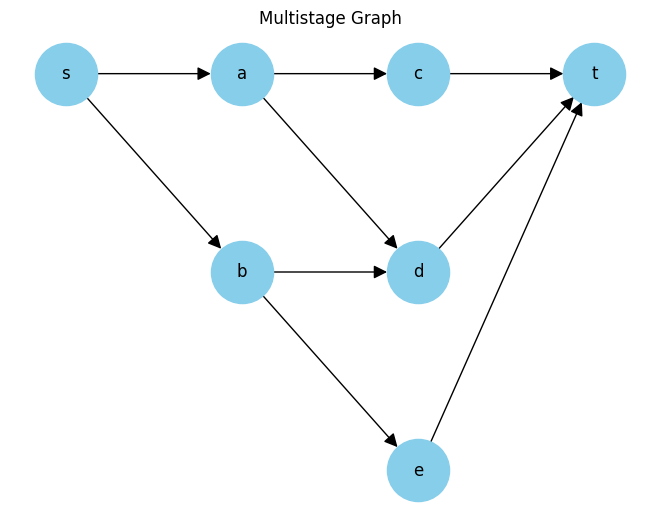

In [14]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Define nodes by stages
stages = {
    0: ['s'],                   # Start
    1: ['a', 'b'],              # Stage 1
    2: ['c', 'd', 'e'],         # Stage 2
    3: ['t']                    # End
}

# Add nodes with stage information

pos = {}
for stage, nodes in stages.items():
    for i, node in enumerate(nodes):
        G.add_node(node, stage=stage)
        pos[node] = (stage, -i)  # horizontal: stage, vertical: spacing between nodes 
# Add edges between stages (you can modify these)
edges = [
    ('s', 'a'), ('s', 'b'),
    ('a', 'c'), ('a', 'd'),
    ('b', 'd'), ('b', 'e'),
    ('c', 't'), ('d', 't'), ('e', 't')
]

# Add edges to the graph
G.add_edges_from(edges)

# Draw the graph
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=12, arrowsize=20)
plt.title("Multistage Graph")
plt.axis('off')
plt.show()


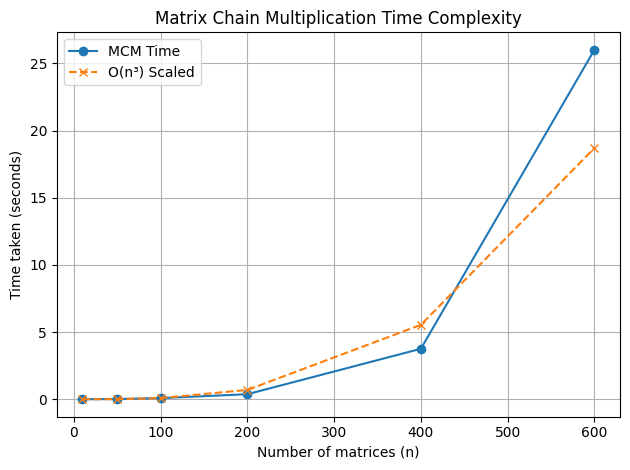

In [2]:
import time
import matplotlib.pyplot as plt
import numpy as np

# Matrix Chain Multiplication (Bottom-Up DP)
def matrix_chain_order(p):
    n = len(p) - 1
    m = [[0] * n for _ in range(n)]
    for L in range(2, n+1):
        for i in range(n-L+1):
            j = i + L - 1
            m[i][j] = float('inf')
            for k in range(i, j):
                q = m[i][k] + m[k+1][j] + p[i]*p[k+1]*p[j+1]
                if q < m[i][j]:
                    m[i][j] = q
    return m[0][n-1]

# Experiment
sizes = [10, 50, 100, 200, 400, 600]  # number of matrices (not size of matrices!)
times = []

for n in sizes:
    dims = [np.random.randint(5, 50) for _ in range(n + 1)]
    start = time.time()
    matrix_chain_order(dims)
    end = time.time()
    times.append(end - start)
scaled_theory = [(x**3) / (sizes[2]**3) * times[2] for x in sizes]

# Plotting
plt.plot(sizes, times, 'o-', label='MCM Time')
plt.plot(sizes, scaled_theory, 'x--', label='O(n³) Scaled')

plt.xlabel('Number of matrices (n)')
plt.ylabel('Time taken (seconds)')
plt.title('Matrix Chain Multiplication Time Complexity')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
